<a href="https://colab.research.google.com/github/OmkarBhikle/MainFlow_Internship_Tasks/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [18]:
#Load the csv file into a dataframe
df = pd.read_csv('/content/heart.csv')

In [19]:
#Standardize the data
#Standardization makes the data mean of 0 and variance of 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [20]:
# Apply PCA
# Here we specify the number of components. It can be less than or equal to the number of original features.
pca = PCA(n_components=5)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(scaled_data)

In [21]:
# Create a DataFrame with the principal components
# This will give us a new DataFrame with the reduced dimensions
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

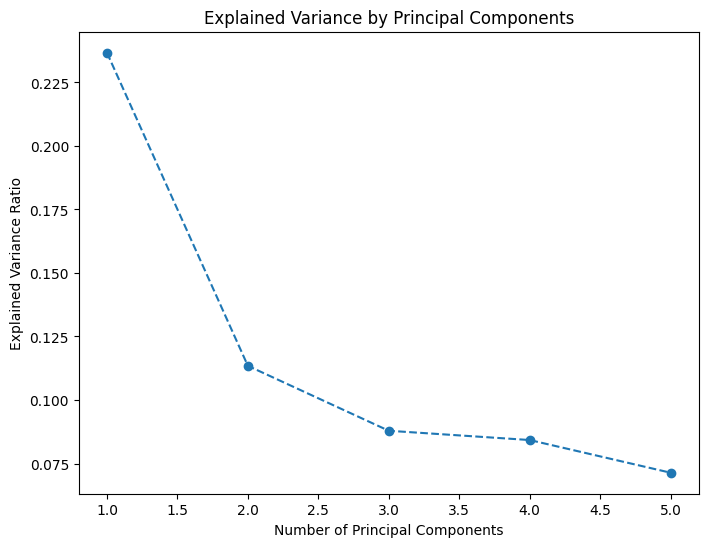

In [22]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [23]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


[0.23669637 0.1134431  0.08788919 0.08423849 0.07137184]
0.593638983917996


[0.23669637 0.35013947 0.43802866 0.52226715 0.59363898]


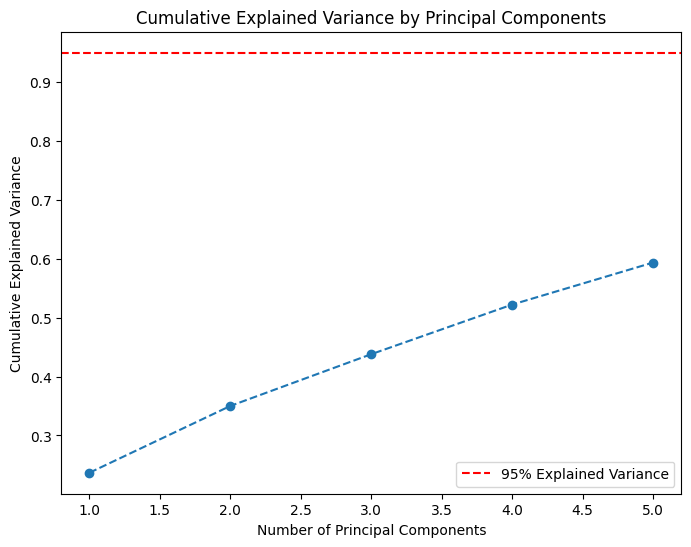

In [24]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()


In [25]:
reconstructed_data = pca.inverse_transform(principal_components)
reconstruction_error = np.mean((scaled_data - reconstructed_data) ** 2)
print('Reconstruction Error:', reconstruction_error)


Reconstruction Error: 0.40636101608200337


So the plotting of Explained Variance Ratio and the numerical value of the reconstruction error shows that the done PCA is not optimal.

So let's make some changes,
1. Change no. of components value to None so that PCA itself decides on an appropriate value.

In [26]:
# Apply PCA
# Here we specify the number of components. It can be less than or equal to the number of original features.
pca = PCA(n_components=None)  # You can adjust the number of components as needed
new_principal_components = pca.fit_transform(scaled_data)

[0.23669637 0.35013947 0.43802866 0.52226715 0.59363898 0.66311951
 0.72572181 0.78058115 0.83299818 0.87824192 0.91596544 0.94702491
 0.97364048 1.        ]


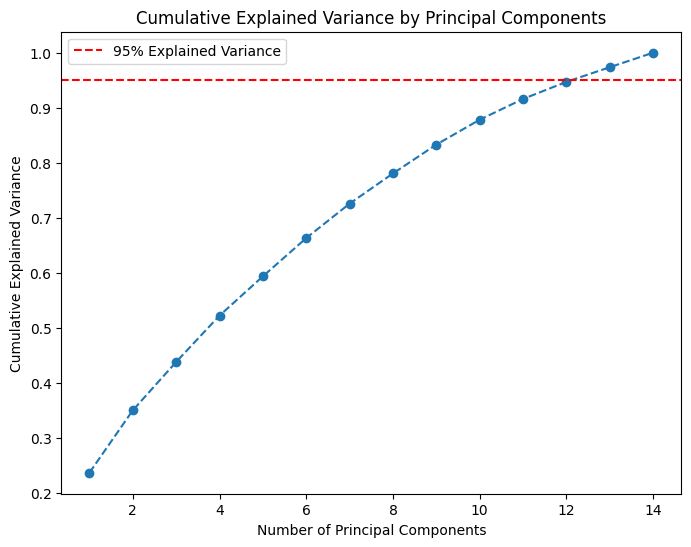

In [27]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [28]:
reconstructed_data = pca.inverse_transform(new_principal_components)
reconstruction_error = np.mean((scaled_data - reconstructed_data) ** 2)
print('Reconstruction Error:', reconstruction_error)


Reconstruction Error: 5.2309135139476385e-30


Now the new PCA model has given better values. The Explained Variance plot is reaching 95% threshold value and the reconstruction error value is also very very small (i.e extremely close to 0). Although as you can see the PCA model when given no. of components value to be set as none so that it can decide the optimal number, it selected the number to be 14. In short, the model is not significantly reducing the dimensions as the PCA model must have identified all the features to be contributing to the result. Even though if you want to reduce the dimensions/features of the model then you can create a variable and calculate the value lower than 14 which will decrease the dimensions but still maintain the explained variance to 95% using some mathematical calculations.